In [18]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('income.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [3]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [4]:
print(df.ndim)
print(df.shape)
print(df.size)

2
(20, 3)
60


In [21]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [45]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
#split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [47]:
def cost_fun(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def gradient_fun(x,y,w,b,learning_rate,epochs):
    cost_list = [0]*epochs
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = cost_fun(x, y, w, b)
        cost_list[epoch]=cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [48]:
w, b, c= gradient_fun(x_train, y_train, np.zeros(x_train.shape[1]), 0, 0.002,epochs=15000)

Cost is: 929068993.0626593
Cost is: 5589470.872840557
Cost is: 1000774.5353538522
Cost is: 876805.4564679179
Cost is: 870188.0784704541
Cost is: 869780.986134615
Cost is: 869755.4859859208
Cost is: 869753.8853081211
Cost is: 869753.7848072433
Cost is: 869753.7784969748


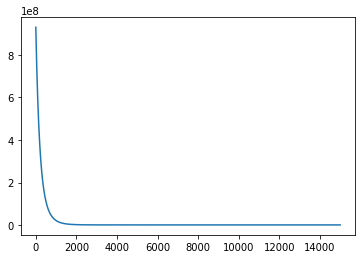

In [49]:
plt.plot(c)

In [55]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(x_test, w, b)
print("predicted_values:"+str(y_pred))
print("actual_values:"+str(y_test))

predicted_values:[31093.37583513 31295.49259273 40250.46099724 34897.69163029]
actual_values:[30450 30870 38900 35670]


In [56]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y_test)

0.93870993637745